In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import unitary_group

from functions import *

[Qibo 0.2.16|WARNING|2025-04-04 09:48:59]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


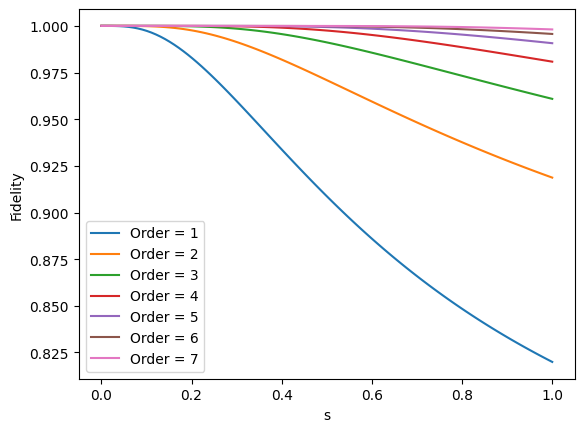

In [6]:
nqubits = 6

H_def = sum([X(x)-Z(x+1)*Z(x)   for x in range(nqubits-1)])
H = -hamiltonians.SymbolicHamiltonian(H_def).matrix
initState = np.random.rand(2**nqubits)
initState = initState / np.linalg.norm(initState)

s = np.linspace(0, 1, 100)
order = [1,2,3,4,5,6,7]
plt.figure()
for i in range(len(order)):
    fidelity = np.zeros(len(s))
    
    for j in range(len(s)):
        state = sp.linalg.expm(-s[j]*H) @ initState
        state /= np.linalg.norm(state)
        coeffs = findRoots(order[i], -s[j])
        stateDBI = matrixPolynomialEvolutionDBI(initState, H, coeffs)
        fidelity[j] = Fidelity(stateDBI, state)
    plt.plot(s, fidelity, label=f"Order = {order[i]}")
plt.xlabel("s")
plt.ylabel("Fidelity")
plt.legend()



In [31]:

def matrixPolynomialEvolutionDBI(initState, H, coeffs):

    steps = len(coeffs)
    state = initState.copy()

    for i in range(steps):
        coeff = coeffs[i]
        s, theta = matrixPolynomialScheduling(state, H, coeff)
        rho = np.outer(state, state.conj())
        W = commutator(rho, H)
        state = sp.linalg.expm(1j*theta*rho) @ sp.linalg.expm(s*W) @ state
    state = state / np.linalg.norm(state)
    return state

def thermalStatePrepMatrixPolynomial(H, nqubits, beta, order):
    """
    Prepares the TFD state at temperature beta and compares it with the final state obtained by the DBI or DBQITE algorithm.
    """
    initState = tfd0(nqubits)
    tfd = TFD(beta, H, initState)
    coeffs = findRoots(order, -beta/2)

    newState = matrixPolynomialEvolutionDBI(initState, H, coeffs)
    fidelity = Fidelity(tfd, newState)

    return fidelity

def thermalStatePrepMatrixPolynomialSteps(H, nqubits, beta, epsilon):
    """
    Prepares the TFD state at temperature beta and compares it with the final state obtained by the DBI or DBQITE algorithm.
    """
    initState = tfd0(nqubits)
    tfd = TFD(beta, H, initState)
    order = 0
    fidelity = Fidelity(tfd, initState)
    while fidelity < 1-epsilon:
        order += 1
        coeffs = findRoots(order, -beta/2)
        newState = matrixPolynomialEvolutionDBI(initState, H, coeffs)
        fidelity = Fidelity(tfd, newState)

    return order

[Qibo 0.2.16|WARNING|2025-04-04 09:42:51]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


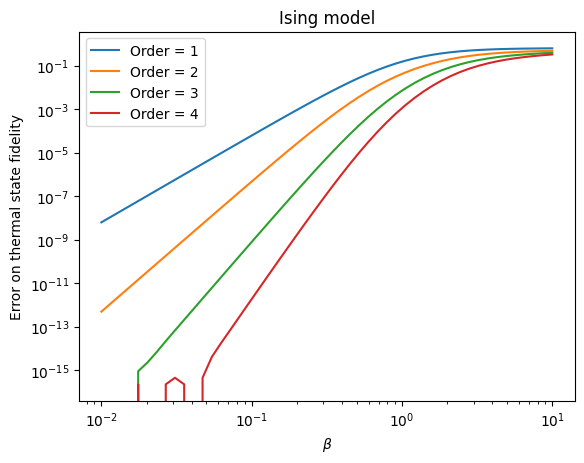

In [10]:
nqubits = 4
H_def = sum([X(x)-Z(x+1)*Z(x)   for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H ,np.eye(2**nqubits))
initState = tfd0(nqubits)

beta = np.logspace(-2, 1, 50)
order = np.arange(1, 5)
fidelity = np.zeros(len(beta))

plt.figure()
plt.title("Ising model")
for j in range(len(order)):
    fidelity = np.zeros(len(beta))
    for i in range(len(beta)):
        fidelity[i] = thermalStatePrepMatrixPolynomial(H, nqubits, beta[i], order[j])

    plt.plot(beta, 1-fidelity, label=f"Order = {order[j]}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\beta$")
plt.ylabel("Error on thermal state fidelity")
plt.legend()
plt.show()


[Qibo 0.2.16|WARNING|2025-04-03 15:10:21]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


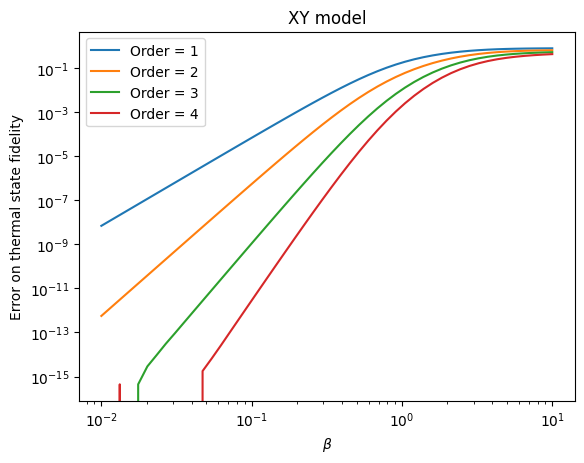

In [18]:
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H ,np.eye(2**nqubits))
initState = tfd0(nqubits)

beta = np.logspace(-2, 1, 50)
order = np.arange(1, 5)
fidelity = np.zeros(len(beta))

plt.figure()
plt.title("XY model")
for j in range(len(order)):
    fidelity = np.zeros(len(beta))
    for i in range(len(beta)):
        fidelity[i] = thermalStatePrepMatrixPolynomial(H, nqubits, beta[i], order[j])

    plt.plot(beta, 1-fidelity, label=f"Order = {order[j]}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\beta$")
plt.ylabel("Error on thermal state fidelity")
plt.legend()
plt.show()


[Qibo 0.2.16|WARNING|2025-04-03 15:10:48]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


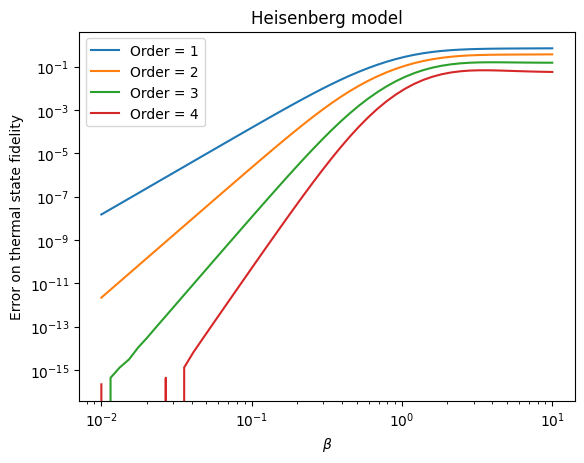

In [ ]:
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)+Z(x+1)*Z(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H ,np.eye(2**nqubits))

beta = np.logspace(-2, 1, 50)
order = np.arange(1, 5)
fidelity = np.zeros(len(beta))

plt.figure()
plt.title("Heisenberg model")
for j in range(len(order)):
    fidelity = np.zeros(len(beta))
    for i in range(len(beta)):
        fidelity[i] = thermalStatePrepMatrixPolynomial(H, nqubits, beta[i], order[j])

    plt.plot(beta, 1-fidelity, label=f"Order = {order[j]}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\beta$")
plt.ylabel("Error on thermal state fidelity")
plt.legend()
plt.show()


[Qibo 0.2.16|WARNING|2025-04-03 15:44:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
100%|██████████| 30/30 [17:05<00:00, 34.18s/it] 


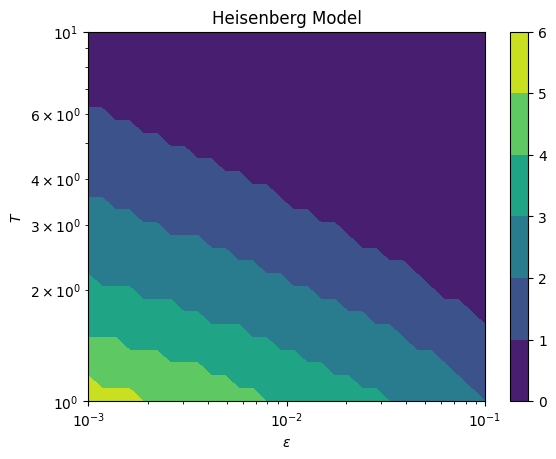

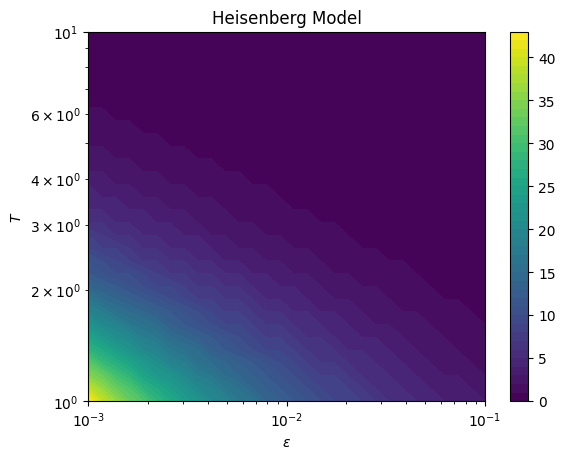

In [45]:
nqubits = 4
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)+Z(x+1)*Z(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H, np.eye(2**nqubits))

beta = np.logspace(-1, 0, 30)
epsilon = np.logspace(-3, -1, 30)
order = np.zeros((len(beta), len(epsilon)))
K = np.zeros((len(beta), len(epsilon)))

for i in tqdm(range(len(beta))):
    for j in range(len(epsilon)):
        order[i,j] = thermalStatePrepMatrixPolynomialSteps(H, nqubits, beta[i], epsilon[j])
        K[i,j] = thermalStatePrepKNumbers(beta[i], epsilon[j], H, nqubits)

plt.figure()
plt.title('Heisenberg Model')
plt.contourf(epsilon, 1/beta, order, levels = np.arange(0, np.max(order)+1, 1))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

plt.figure()
plt.title('Heisenberg Model')
plt.contourf(epsilon, 1/beta, K, levels = np.arange(0, np.max(K)+1, 1))
plt.ylabel(r'$T$')
plt.xlabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()



In [ ]:
def inversePolynomial(a, K, x):
    g = 0
    for l in range(1, K+1):
        term = 0    
        for j in range(l+1, a+1):
            term += sp.special.comb(2*a, a+j)
        term *= (-1)**l / 2**(2*a) * sp.special.eval_chebyt(2*l+1, x)
        g += term
    return 4*g

def getPolynomialCoefficients(a, K, x):
    """Expands the polynomial into standard form and returns coefficients."""
    # Determine maximum degree needed (2K+1 since we use T_{2l+1} up to l=K)
    max_degree = 2*K + 1
    coeffs = np.zeros(max_degree + 1)  # [c_0, c_1, ..., c_{max_degree}]
    
    for l in range(1, K+1):
        # Compute the combinatorial sum
        comb_sum = sum(sp.special.comb(2*a, a+j, exact=True) for j in range(l+1, a+1))
        
        # Get Chebyshev polynomial coefficients for T_{2l+1}(x)
        cheb_coeffs = np.zeros(2*l + 2)
        cheb_coeffs[-1] = 1  
        poly_coeffs = np.polynomial.chebyshev.cheb2poly(cheb_coeffs)
        
        # Scale the coefficients
        scale = (-1)**l / (2**(2*a)) * comb_sum
        scaled_coeffs = scale * poly_coeffs
        
        # Only keep coefficients up to max_degree
        if len(scaled_coeffs) > max_degree + 1:
            scaled_coeffs = scaled_coeffs[:max_degree + 1]
        
        # Pad with zeros at the beginning if needed
        if len(scaled_coeffs) < max_degree + 1:
            scaled_coeffs = np.pad(scaled_coeffs, 
                                  (max_degree + 1 - len(scaled_coeffs), 0), 
                                  'constant')
        
        coeffs += scaled_coeffs
    
    coeffs *= 4
    # Trim leading zeros
    coeffs = np.trim_zeros(coeffs, 'f')
    return coeffs

def factorizePolynomial(a, K):
    """Computes roots and returns factorized form."""
    coeffs = getPolynomialCoefficients(a, K)
    roots = np.roots(coeffs)
    leading_coeff = coeffs[0] if len(coeffs) > 0 else 1
    
    # Construct factorized form
    factors = []
    for root in roots:
        if np.imag(root) == 0:
            factors.append(f"(x - {np.real(root):.6f})")
        else:
            factors.append(f"(x - ({np.real(root):.6f} + {np.imag(root):.6f}j))")
    
    factorized_form = f"{leading_coeff:.6f} * " + " * ".join(factors)
    return factorized_form, roots


a = 22, K = 15


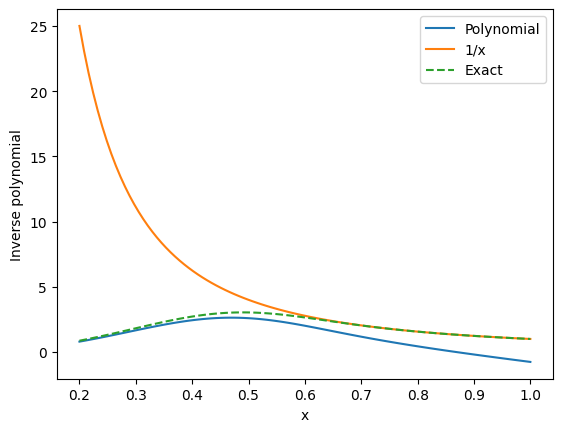

In [257]:
x = np.linspace(0.2, 1.0, 100)
kappa = 2
eps = 0.01
tau = 2.0
a = int(np.ceil(kappa**2*np.log(kappa/eps)))
K = int(np.ceil(np.sqrt(a*np.log(4*a/eps))))
print(f"a = {a}, K = {K}")
plt.figure()
plt.plot(x, inversePolynomial(a, K, x, tau), label='Polynomial')
plt.plot(x, 1/(x**tau), label = '1/x')
plt.plot(x, (1-(1-x**(tau**2))**a)/x**tau, '--', label = 'Exact')
plt.xlabel("x")
plt.ylabel("Inverse polynomial")
plt.legend()
plt.show()



[Qibo 0.2.16|WARNING|2025-04-07 11:49:47]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
100%|██████████| 100/100 [00:01<00:00, 79.77it/s]


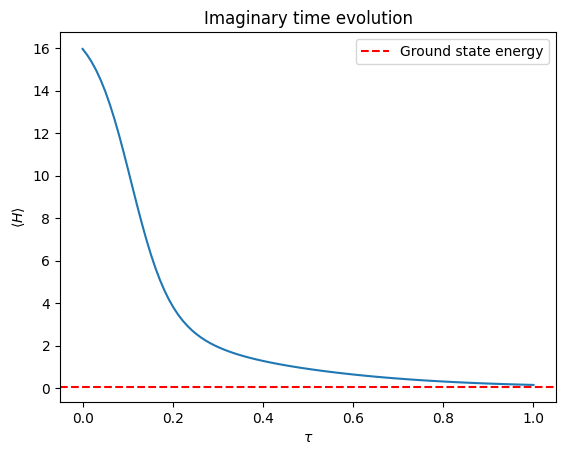

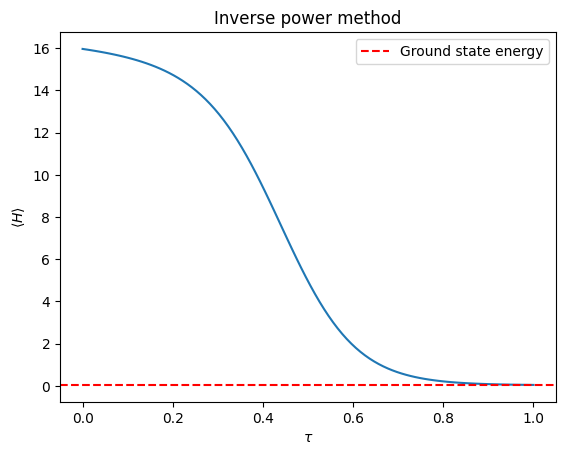

In [237]:
nqubits = 6
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)+Z(x+1)*Z(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix

a = -10
b = 100
H = b*(H-a*np.eye(2**nqubits))/np.linalg.norm(H-a*np.eye(2**nqubits))
state = np.random.rand(2**nqubits)
state /= np.linalg.norm(state)
H_inv = np.linalg.inv(H)
E0 = np.linalg.eigvalsh(H)[0]   

tau = np.linspace(0, 1, 100)
E = np.zeros(len(tau))
E2 = np.zeros(len(tau))

for t in tqdm(range(len(tau))):

    stateEvol = sp.linalg.fractional_matrix_power(H_inv, tau[t]) @ state
    stateEvol /= np.linalg.norm(stateEvol)
    E[t] = np.real(stateEvol.conj().T @ H @ stateEvol)

    stateEvol = sp.linalg.expm(-tau[t]*H) @ state
    stateEvol /= np.linalg.norm(stateEvol)
    E2[t] = np.real(stateEvol.conj().T @ H @ stateEvol)

plt.figure()
plt.plot(tau, E2)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\langle H \rangle$")
plt.title("Imaginary time evolution")
plt.axhline(E0, color='red', linestyle='--', label = 'Ground state energy')
plt.legend()
plt.show()

plt.figure()
plt.plot(tau, E)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\langle H \rangle$")
plt.title("Inverse power method")
plt.axhline(E0, color='red', linestyle='--', label = 'Ground state energy')
plt.legend()
plt.show()

In [ ]:
nqubits = 6
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)+Z(x+1)*Z(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
E0 = np.linalg.eigvalsh(H)[0]
H = H - E0*np.eye(2**nqubits)
state = np.random.rand(2**nqubits)
state /= np.linalg.norm(state)

kappa = 2
eps = 0.1
a = int(np.ceil(kappa**2*np.log(kappa/eps)))
K = int(np.ceil(np.sqrt(a*np.log(4*a/eps))))

tau = np.linspace(0, 1, 100)
for i in range(len(tau)):
    _, coeffs = factorizePolynomial(a, K)
    

    stateEvol /= np.linalg.norm(stateEvol)

[Qibo 0.2.16|WARNING|2025-04-07 13:21:57]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
